In [101]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

In [102]:
def LassoGD(y, tx, initial_w, lambda_, max_iters, gamma):
    """Gradient descent algorithm for Lasso"""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and loss
        grad = compute_gradient_Lasso(y, tx, w, lambda_)
        loss = compute_loss_Lasso(y, tx, w, lambda_)
        print("grad = ",grad)
        # gradient w by descent update
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        # print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
        #     bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [103]:
def compute_loss_Lasso(y, tx, w, lambda_):
    """Compute the loss."""
    e = y - tx.dot(w)
    loss = np.sum(e**2) / 2 + lambda_ * np.sum(np.abs(w))
    return loss

In [104]:
def compute_gradient_Lasso(y, tx, w, lambda_):
    """Compute the gradient."""
    # find the gradient to be used in the gradient descent
    pred = tx.dot(w)
    e = y - pred
    grad = -tx.T.dot(e) + lambda_ * np.sign(w)
    return grad
        

In [105]:
def RidgeGD(y, tx, initial_w, lambda_, max_iters, gamma):
    """Gradient descent algorithm for Ridge"""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and loss
        grad = compute_gradient_Ridge(y, tx, w, lambda_)
        loss = compute_loss_Ridge(y, tx, w, lambda_)
        # gradient w by descent update
        print("grad = ",grad)
        print("gamma = ",gamma)
        #convert tuple to list
        
        w = w - grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        # print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
        #     bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [106]:
def compute_gradient_Ridge(y, tx, w, lambda_):
    """Compute the gradient."""
    e = y - tx.dot(w)
    grad = -tx.T.dot(e) + lambda_ * w
    return grad

In [107]:
def compute_loss_Ridge(y, tx, w, lambda_):
    """Compute the loss."""
    e = y - tx.dot(w)
    loss = np.sum(e**2) / 2 + lambda_ * np.sum(w**2)
    return loss

In [108]:
def ElasticNetGD(y, tx, initial_w, lambda_, max_iters, gamma, alpha):
    """Gradient descent algorithm for Elastic Net"""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and loss
        grad = compute_gradient_ElasticNet(y, tx, w, lambda_, alpha)
        loss = compute_loss_ElasticNet(y, tx, w, lambda_, alpha)
        # gradient w by descent update
        
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        # print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
        #     bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [109]:
def compute_loss_ElasticNet(y, tx, w, lambda_, alpha):
    """Compute the loss."""
    e = y - tx.dot(w)
    loss = np.sum(e**2) / 2 + lambda_ * (alpha * np.sum(np.abs(w)) + (1 - alpha) * np.sum(w**2)/2)
    return loss

In [110]:
def compute_gradient_ElasticNet(y, tx, w, lambda_, alpha):
    """Compute the gradient."""
    e = y - tx.dot(w)
    grad = -tx.T.dot(e) + lambda_ * (alpha * np.sign(w) + (1 - alpha) * w)
    return grad

In [111]:
def crossValidate(y, tx, k_fold, lambda_, max_iters, gamma, alpha):
    """ returns losses for each regularisation
    i.e Lasso, Ridge, Elastic Net
    """
    losses = []
    weights = []
    for i in range(k_fold):
        # split data into training and test set
        y_train = y[i*len(y)//k_fold:(i+1)*len(y)//k_fold]
        y_test_1 = y[:i*len(y)//k_fold] 
        y_test_2 = y[(i+1)*len(y)//k_fold:]
        y_test = np.concatenate((y_test_1, y_test_2))
        # y_train, y_test = y[i*len(y)//k_fold:(i+1)*len(y)//k_fold], y[:i*len(y)//k_fold] + y[(i+1)*len(y)//k_fold:]
        # tx_train, tx_test = tx[i*len(tx)//k_fold:(i+1)*len(tx)//k_fold], tx[:i*len(tx)//k_fold] + tx[(i+1)*len(tx)//k_fold:]
        tx_train = tx[i*len(tx)//k_fold:(i+1)*len(tx)//k_fold]
        tx_test_1 = tx[:i*len(tx)//k_fold]
        tx_test_2 = tx[(i+1)*len(tx)//k_fold:]
        tx_test = np.concatenate((tx_test_1, tx_test_2))
        #choose a gamma
        gamma = 0.01
        #initilize initial weights
        #print(tx_train)
        initial_w = np.zeros(tx_train.shape)
        #print(initial_w)
        # train model and predict
        losses_lasso, ws_lasso = LassoGD(y_train, tx_train,initial_w, lambda_, max_iters, gamma)
        # losses_ridge, ws_ridge = RidgeGD(y_train, tx_train,initial_w, lambda_, max_iters, gamma)
        # losses_elastic, ws_elastic = ElasticNetGD(y_train, tx_train, initial_w,lambda_, max_iters, gamma, alpha)
        # append losses
        losses.append(losses_lasso)
        # losses.append(losses_ridge)
        # losses.append(losses_elastic)
        # append weights
        weights.append(ws_lasso)
        # weights.append(ws_ridge)
        # weights.append(ws_elastic)

    return losses, weights


In [112]:

n = 60
x = np.random.uniform(0, 10, n)

# a be any real number
a = 20
b = 10
e = np.random.normal(0, 1, n)*5

y = a * x + b + e


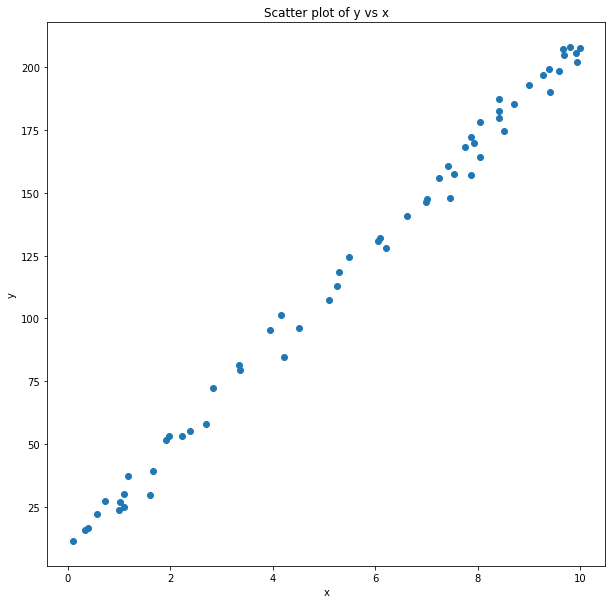

In [113]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [114]:
losses, weights = crossValidate(y, x, 6, 0, 10000, 0.01, 0.5)

grad =  [-9770.79699227 -9770.79699227 -9770.79699227 -9770.79699227
 -9770.79699227 -9770.79699227 -9770.79699227 -9770.79699227
 -9770.79699227 -9770.79699227]
grad =  [349250.30268384 349250.30268384 349250.30268384 349250.30268384
 349250.30268384 349250.30268384 349250.30268384 349250.30268384
 349250.30268384 349250.30268384]
grad =  [-12483707.72837468 -12483707.72837468 -12483707.72837468
 -12483707.72837468 -12483707.72837468 -12483707.72837468
 -12483707.72837468 -12483707.72837468 -12483707.72837468
 -12483707.72837468]
grad =  [4.46221399e+08 4.46221399e+08 4.46221399e+08 4.46221399e+08
 4.46221399e+08 4.46221399e+08 4.46221399e+08 4.46221399e+08
 4.46221399e+08 4.46221399e+08]
grad =  [-1.59498717e+10 -1.59498717e+10 -1.59498717e+10 -1.59498717e+10
 -1.59498717e+10 -1.59498717e+10 -1.59498717e+10 -1.59498717e+10
 -1.59498717e+10 -1.59498717e+10]
grad =  [5.70117006e+11 5.70117006e+11 5.70117006e+11 5.70117006e+11
 5.70117006e+11 5.70117006e+11 5.70117006e+11 5.70117006e+11

<ipython-input-103-958f86849f9f>:4: RuntimeWarning: overflow encountered in square
  loss = np.sum(e**2) / 2 + lambda_ * np.sum(np.abs(w))
<ipython-input-103-958f86849f9f>:4: RuntimeWarning: invalid value encountered in double_scalars
  loss = np.sum(e**2) / 2 + lambda_ * np.sum(np.abs(w))
<ipython-input-102-f6c834934e86>:13: RuntimeWarning: invalid value encountered in subtract
  w = w - gamma * grad


 [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad =  [nan nan nan nan nan nan nan nan nan nan]
grad = 

/Users/divyansh/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[-1.18842814e+302 -1.18842814e+302 -1.18842814e+302 -1.18842814e+302
 -1.18842814e+302 -1.18842814e+302 -1.18842814e+302 -1.18842814e+302
 -1.18842814e+302 -1.18842814e+302]
grad =  [2.47972453e+303 2.47972453e+303 2.47972453e+303 2.47972453e+303
 2.47972453e+303 2.47972453e+303 2.47972453e+303 2.47972453e+303
 2.47972453e+303 2.47972453e+303]
grad =  [-5.17408967e+304 -5.17408967e+304 -5.17408967e+304 -5.17408967e+304
 -5.17408967e+304 -5.17408967e+304 -5.17408967e+304 -5.17408967e+304
 -5.17408967e+304 -5.17408967e+304]
grad =  [1.07960394e+306 1.07960394e+306 1.07960394e+306 1.07960394e+306
 1.07960394e+306 1.07960394e+306 1.07960394e+306 1.07960394e+306
 1.07960394e+306 1.07960394e+306]
grad =  [-2.25265651e+307 -2.25265651e+307 -2.25265651e+307 -2.25265651e+307
 -2.25265651e+307 -2.25265651e+307 -2.25265651e+307 -2.25265651e+307
 -2.25265651e+307 -2.25265651e+307]
grad =  [inf inf inf inf inf inf inf inf inf inf]
grad =  [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
grad =  

We were facing nan issue and we couldnt figure out why. We tried to resolve it and compared it with general linear regression, but the problem seems to persist.